**IMPORTING** **LIBRARIES**


In [29]:
import pandas as pd

In [30]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Load** **Dataset**

In [31]:
# Load the dataset containing Cricket Tweets
df = pd.read_csv('cricket_tweets.csv')

In [32]:
print(df.head())

                    id      user_name  user_location  \
0  1433440359477096453  Cricket World         Global   
1  1433438874995343361        Ⓜ️ithun    मुंबई, भारत   
2  1433436646645501956     Akram Khan            NaN   
3  1433433904438931474           Mr.P  Mumbai, India   
4  1433433383024005131   Cricket_Kith            NaN   

                                    user_description         user_created  \
0  Official Twitter account of Cricket World - ne...  2009-01-23 10:49:02   
1      Cricket 🏏\nPhotography📷 \nWildlife🐅 \nNature🌳  2010-01-09 15:38:06   
2       BLOGGER | ＣＲＩＣＫＥＴ ＬＯＶＥＲ | Fond of full forms  2014-07-08 00:39:28   
3                                            nothing  2013-08-25 10:07:10   
4  Crick, Crick, Cricket🏏\nDon't Throw Your Wicke...  2021-09-01 11:39:18   

   user_followers  user_friends  user_favourites  user_verified  \
0           58699          9834            90829           True   
1               7            97              343          False   

**Data** **Cleaning**

In [33]:
# Select the relevant columns from the dataset
selected_columns = ['id','user_location','date', 'text','hashtags', 'source','retweets','favorites']
df_selected = df[selected_columns]


In [34]:
# Perform analysis on the selected data
# TODO: Perform desired analysis on the dataset

# Print the first few rows of the selected data
print(df_selected.head())

                    id  user_location                 date  \
0  1433440359477096453         Global  2021-09-02 14:43:08   
1  1433438874995343361    मुंबई, भारत  2021-09-02 14:37:14   
2  1433436646645501956            NaN  2021-09-02 14:28:23   
3  1433433904438931474  Mumbai, India  2021-09-02 14:17:29   
4  1433433383024005131            NaN  2021-09-02 14:15:25   

                                                text  \
0  🏏 Rizwan Cheema has been named team captain of...   
1  Virat Kohli being fixated on retaining specifi...   
2  My tribute to the world's fastest bowler ever,...   
3  this guy's life is incomplete without Kohli's ...   
4  When Rishabh Pant Stepped Out Robinson 😂\nWhol...   

                                            hashtags               source  \
0                                                NaN      Twitter Web App   
1                                                NaN  Twitter for Android   
2                    ['shoaibakhtarpeaceambassador']      T

In [35]:
df.shape

(60862, 16)

In [36]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60862 entries, 0 to 60861
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                60862 non-null  int64 
 1   user_name         60862 non-null  object
 2   user_location     40594 non-null  object
 3   user_description  57449 non-null  object
 4   user_created      60862 non-null  object
 5   user_followers    60862 non-null  int64 
 6   user_friends      60862 non-null  int64 
 7   user_favourites   60862 non-null  int64 
 8   user_verified     60862 non-null  bool  
 9   date              60862 non-null  object
 10  text              60862 non-null  object
 11  hashtags          42038 non-null  object
 12  source            60862 non-null  object
 13  retweets          60862 non-null  int64 
 14  favorites         60862 non-null  int64 
 15  is_retweet        60862 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 6.6+ MB


In [38]:
df['user_location'].value_counts()

India                        3708
Pakistan                     1836
New Delhi, India             1452
Mumbai, India                 971
Global                        951
                             ... 
Newcastle-Upon-Tyne             1
Boughton Monchelsea, Kent       1
Maroc                           1
Manali                          1
kabirwala                       1
Name: user_location, Length: 5105, dtype: int64

In [39]:
#  Perform analysis on the selected data
# TODO: Perform your desired analysis on the dataset
# Example: Calculate the average number of retweets
avg_retweets = df_selected['retweets'].mean()
print("Average number of retweets:", avg_retweets)



Average number of retweets: 1.974614702112977


In [40]:
# Display the first few rows of the selected data
print("First few rows of the selected data:")
print(df_selected.head())

First few rows of the selected data:
                    id  user_location                 date  \
0  1433440359477096453         Global  2021-09-02 14:43:08   
1  1433438874995343361    मुंबई, भारत  2021-09-02 14:37:14   
2  1433436646645501956            NaN  2021-09-02 14:28:23   
3  1433433904438931474  Mumbai, India  2021-09-02 14:17:29   
4  1433433383024005131            NaN  2021-09-02 14:15:25   

                                                text  \
0  🏏 Rizwan Cheema has been named team captain of...   
1  Virat Kohli being fixated on retaining specifi...   
2  My tribute to the world's fastest bowler ever,...   
3  this guy's life is incomplete without Kohli's ...   
4  When Rishabh Pant Stepped Out Robinson 😂\nWhol...   

                                            hashtags               source  \
0                                                NaN      Twitter Web App   
1                                                NaN  Twitter for Android   
2                    [

**Labelling** **data**

In [41]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Extract the text feature
tweet = df['text']
# Perform sentiment analysis and assign labels
labels = []
for text in tweet:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    label = 1 if sentiment > 0 else 0
    labels.append(label)

# Add the labels to the DataFrame
df['label'] = labels

# Print the text feature and labels
print("Text Feature:\n")
print(tweet)
print("\nLabels:\n")
print(labels)


Text Feature:

0        🏏 Rizwan Cheema has been named team captain of...
1        Virat Kohli being fixated on retaining specifi...
2        My tribute to the world's fastest bowler ever,...
3        this guy's life is incomplete without Kohli's ...
4        When Rishabh Pant Stepped Out Robinson 😂\nWhol...
                               ...                        
60857    Lanka Premier League 2021 Season - 02 \n🎇🎆🎇🎆🎇 ...
60858    @iamalihamxa Pakistan's 10 wins (T20I WC and B...
60859    Message from #FaiqKhan to Gujranwala's cricket...
60860    I love how Zahir Khan and Qais Ahmed do not ev...
60861    #news\n#Australia captain Pat Cummins has beco...
Name: text, Length: 60862, dtype: object

Labels:

[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

**SENTIMENT ANALYSIS**

In [42]:
# Perform sentiment analysis on the 'text' column
df_selected['sentiment'] = df_selected['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Print the average sentiment score
avg_sentiment = df_selected['sentiment'].mean()
print("Average sentiment score:", avg_sentiment)

Average sentiment score: 0.1423987042515357


<ipython-input-42-484590e36087>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['sentiment'] = df_selected['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


**PLOT FOR SENTIMENT SCORE**


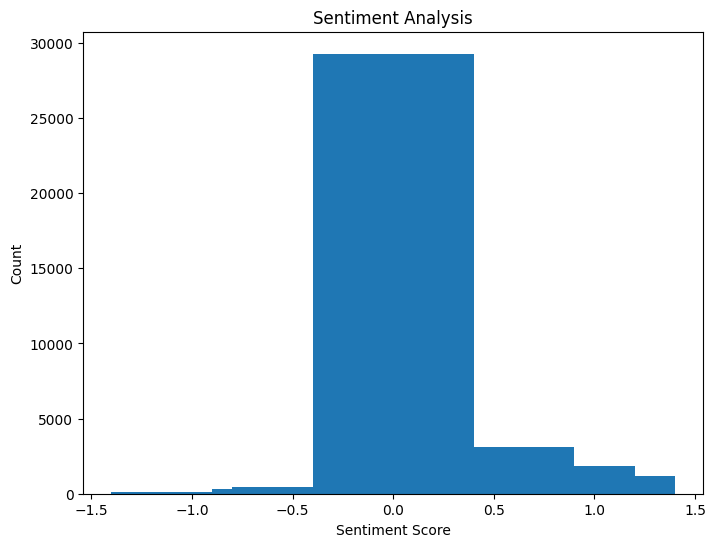

In [43]:
plt.figure(figsize=(8, 6))
plt.bar(df_selected['sentiment'].value_counts().index, df_selected['sentiment'].value_counts().values)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()


**HASHTAGS** **ANALYSIS**

In [44]:
# Select the 'hashtags' column and drop missing values
hashtags = df['hashtags'].dropna()

In [45]:
 #Split the hashtags and convert to lowercase
hashtags = hashtags.str.lower().str.split(',')


In [46]:
# Flatten the list of hashtags
hashtags = [tag for sublist in hashtags if isinstance(sublist, list) for tag in sublist]


In [47]:
# Count the frequency of each hashtag
hashtag_counts = Counter(hashtags)

# Print the top 10 most common hashtags
top_hashtags = hashtag_counts.most_common(10)
for hashtag, count in top_hashtags:
    print(hashtag, count)

['cricket' 9686
 'cricket' 8625
 'cricket'] 7350
['cricket'] 5893
 'score' 1584
 'cricketscore'] 1581
 'ipl2021' 1579
 'india' 1115
 't20worldcup' 1046
 'ipl' 1022


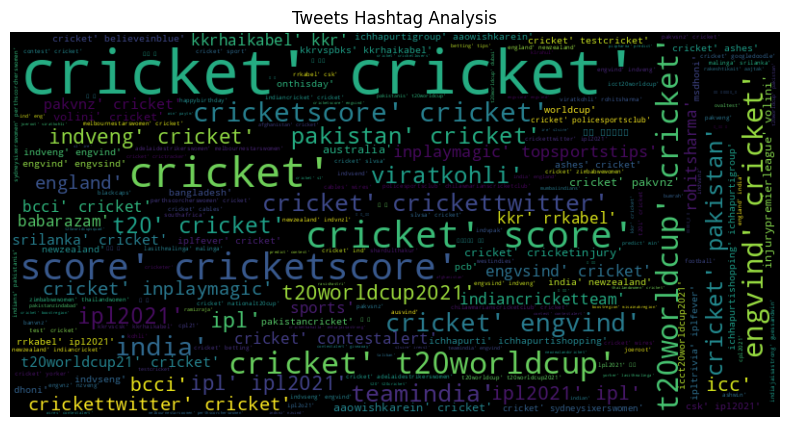

In [48]:
# Generate word cloud of hashtags
all_hashtags = ' '.join(hashtags)
wordcloud = WordCloud(width=800, height=400, background_color='BLACK').generate(all_hashtags)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tweets Hashtag Analysis')
plt.show()



**USER ENGAGEMENT ANALYSIS**

In [49]:
# Calculate the average retweet and favorite counts
avg_retweet= df['retweets'].mean();
avg_favourite= df['favorites'].mean();
print("Averge Retweets Count : ", avg_retweet);
print("Averge Favourite Count : ", avg_favourite);

Averge Retweets Count :  1.974614702112977
Averge Favourite Count :  22.087312280240543


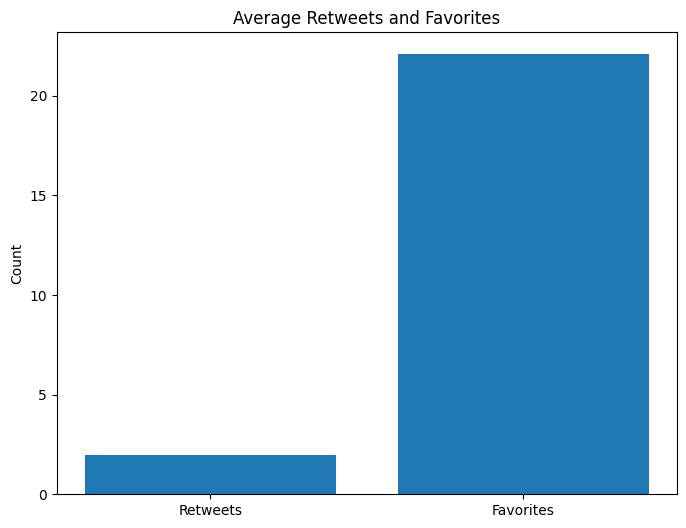

In [50]:
plt.figure(figsize=(8, 6))
plt.bar(['Retweets', 'Favorites'], [avg_retweet, avg_favourite])
plt.ylabel('Count')
plt.title('Average Retweets and Favorites')
plt.show()


**USER LOCATION ANALYSIS**

In [51]:
# Extract the top 5 most common user locations
top_locations = df_selected['user_location'].value_counts().head(5)
print("Top 5 user locations:")
print(top_locations)

Top 5 user locations:
India               3708
Pakistan            1836
New Delhi, India    1452
Mumbai, India        971
Global               951
Name: user_location, dtype: int64


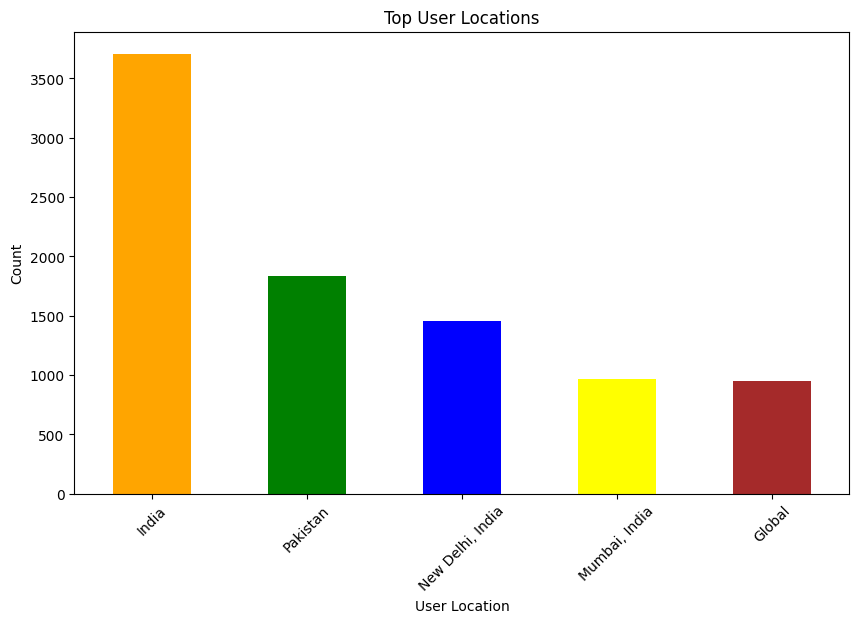

In [52]:
# Plot the top user locations
plt.figure(figsize=(10,6))
colors=['orange','green','blue','yellow','brown']
top_locations.plot(kind='bar', color= colors)
plt.xlabel('User Location')
plt.ylabel('Count')
plt.title('Top User Locations')
plt.xticks(rotation= 45)
plt.show()

**SOURCE ANALYSIS**

In [53]:
# Count the number of tweets from each source
SOURCE_COUNTS= df_selected['source'].value_counts()
print("Tweet source distribution:")
print(SOURCE_COUNTS)


Tweet source distribution:
Twitter for Android    26775
Twitter Web App        15513
Twitter for iPhone      6600
Sachin T.               3927
TweetDeck               2348
                       ...  
Fenix 2                    1
Kurungsiku Engine          1
Hash#trends                1
BigMiskatesss              1
Oyeyeah                    1
Name: source, Length: 157, dtype: int64


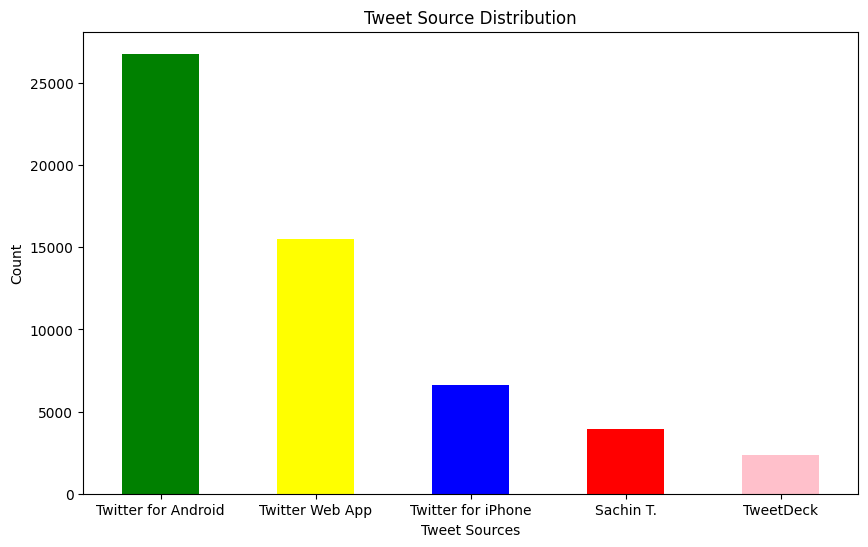

In [54]:
# Plot the top user locations
top_sources = SOURCE_COUNTS[:5]
plt.figure(figsize=(10,6))
colors=['green','yellow','blue','red','pink']
top_sources .plot(kind='bar', color= colors)
plt.xlabel('Tweet Sources')
plt.ylabel('Count')
plt.title('Tweet Source Distribution')
plt.xticks(rotation= 0)
plt.show()

**TIME BASED ANALYSIS**

In [55]:
# Convert the 'timestamp' column to datetime format
df_selected['date'] = pd.to_datetime(df_selected['date'])

<ipython-input-55-8b3e2dd19881>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['date'] = pd.to_datetime(df_selected['date'])


In [56]:
# Extract the day of the week from the timestamp
df_selected['day_of_week']= df_selected['date'].dt.day_name()

<ipython-input-56-9becf6816af7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['day_of_week']= df_selected['date'].dt.day_name()


In [57]:
# Count the number of tweets on each day of the week
day_counts = df_selected['day_of_week'].value_counts()
print("Tweet count by day of the week:")
print(day_counts)

Tweet count by day of the week:
Thursday     10595
Sunday       10364
Friday        9738
Saturday      9078
Wednesday     8621
Monday        6603
Tuesday       5863
Name: day_of_week, dtype: int64


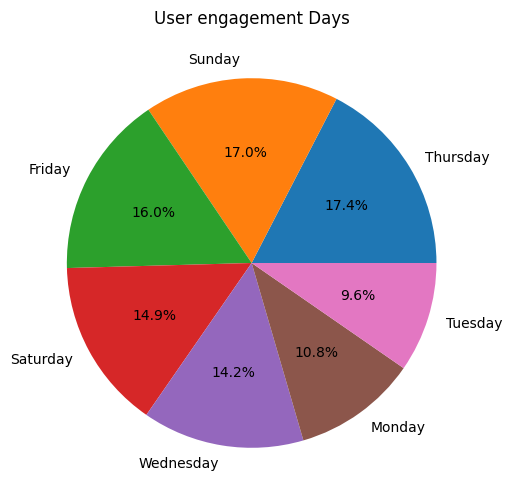

In [58]:
# Plot the user verification distribution
plt.figure(figsize=(8, 6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%')
plt.title('User engagement Days')
plt.show()

**Using** **Logistic** **Regression**

In [59]:
# Preprocess the tweets
preprocessed_tweets = [TextBlob(tweet).lower() for tweet in tweet]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_tweets, labels, test_size=0.001, random_state=42)

# Convert TextBlob objects back to strings
X_train_strings = [str(tweet.raw) for tweet in X_train]
X_test_strings = [str(tweet.raw) for tweet in X_test]

# Vectorize the tweets using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_strings)
X_test_vectorized = vectorizer.transform(X_test_strings)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Prediction** **and** **Accuracy**

In [60]:

# Predict the labels for the test set
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9672131147540983


In [61]:

import pickle
with open('sentiment_analysis_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [62]:
with open('sentiment_analysis_model.pkl', 'rb') as file:
    model = pickle.load(file)